asdfsad

In [6]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
project_dir = os.path.dirname(os.getcwd())
data_path = os.path.join(project_dir, "cleandata", "combined_personas_sample.csv")

df = pd.read_csv(
    data_path,
    #low_memory=False,
    na_values=["NaN", "NA", "N/A", "", " "],
    dtype={"UPM": str}
)
print(df.shape)

(80000, 66)


In [8]:
df[df.columns[54]].apply(type).value_counts()

UPM
<class 'str'>      72000
<class 'float'>     8000
Name: count, dtype: int64

Variables Selection

In [9]:
df.columns

Index(['ANIO', 'ID_PERSONA', 'LLAVE_ENTIDAD', 'LLAVE_MUNICIPIO',
       'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_LOCALIDAD',
       'CLAVE_LOCALIDAD_INEGI', 'ID_VIVIENDA', 'ID_HOGAR', 'LLAVE_COBERTURA',
       'LLAVE_CLASEVIVIENDA', 'LLAVE_SEXO', 'LLAVE_PARENTESCO',
       'LLAVE_IDENTMADRE', 'LLAVE_IDENTPADRE', 'LLAVE_PAIS_NAC',
       'LLAVE_ENTIDAD_NAC', 'LLAVE_NACIONALIDAD', 'LLAVE_SERSALUD',
       'LLAVE_AFRODES', 'LLAVE_REGISNAC', 'LLAVE_RELIGION', 'LLAVE_HLENGUA',
       'LLAVE_LENGUAMAT', 'LLAVE_HESPANOL', 'LLAVE_ELENGUA',
       'LLAVE_PERTEINDIGENA', 'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR',
       'LLAVE_ENTIDAD_ASISESCOLAR', 'LLAVE_MUNICIPIO_ASISESCOLAR',
       'LLAVE_TIETRASLADO_ESCOLAR', 'LLAVE_MEDTRASLADO_ESCOLAR',
       'LLAVE_NIVACAD', 'LLAVE_CARRERA', 'LLAVE_ALFABETISMO',
       'LLAVE_PAIS_RES5A', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_MUNICIPIO_RES5A',
       'LLAVE_CAUSAMIGRACION', 'LLAVE_SITUACONYUGAL', 'LLAVE_IDENTPAREJA',
       'LLAVE_ACTPRIMARIA', 'LLAVE_

Data Exploration

In [10]:
# 1) Setup
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

# 2) Define your variable groups
# Continuous variables
continuous_vars = [
    "INGRESO", "HORAS_TRABAJADAS", "ESCOLARIDAD_ACUMULADA", "EDAD", "LLAVE_TIETRASLADO_TRABAJO"
]

# Categorical variables
categorical_vars = [
    "MERCADO_TRABAJO_LOCAL", "ACTIVIDAD_ECONOMICA_INEGI", "LLAVE_SITTRA", "LLAVE_OCUPACION", "LLAVE_ACTPRIMARIA",
    "LLAVE_ALFABETISMO", "LLAVE_NIVACAD", "LLAVE_SITUACONYUGAL", "LLAVE_CAUSAMIGRACION",
    "LLAVE_PERTEINDIGENA", "LLAVE_HESPANOL", "LLAVE_RELIGION", "LLAVE_AFRODES", "LLAVE_NACIONALIDAD", "LLAVE_SEXO"
]


In [11]:
# 1) Setup
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

# 2) Define continuous variables
continuous_vars = [
    "INGRESO", "HORAS_TRABAJADAS", "ESCOLARIDAD_ACUMULADA", "EDAD",
    "LLAVE_TIETRASLADO_TRABAJO", "FACTOR_EXP", "NUMPERSONA",
    "HIJOS_NACIDOS", "HIJOS_VIVOS", "HIJOS_FALLECIDOS"
]

# 3) Define categorical variables as the remaining columns
all_columns = df.columns.tolist()
categorical_vars = list(set(all_columns) - set(continuous_vars))

# 4) Done!
print("✅ Continuous Variables:", continuous_vars)
print("\n✅ Categorical Variables:", categorical_vars)

✅ Continuous Variables: ['INGRESO', 'HORAS_TRABAJADAS', 'ESCOLARIDAD_ACUMULADA', 'EDAD', 'LLAVE_TIETRASLADO_TRABAJO', 'FACTOR_EXP', 'NUMPERSONA', 'HIJOS_NACIDOS', 'HIJOS_VIVOS', 'HIJOS_FALLECIDOS']

✅ Categorical Variables: ['LLAVE_SEXO', 'ESTRATO', 'ANIO', 'LLAVE_ACTECONOMICA', 'LLAVE_SITUACONYUGAL', 'ACTIVIDAD_ECONOMICA_INEGI', 'LLAVE_NIVACAD', 'LLAVE_MUNICIPIO', 'LLAVE_TIETRASLADO_ESCOLAR', 'LLAVE_IDENTMADRE', 'LLAVE_MEDTRASLADO_ESCOLAR', 'LLAVE_MUNICIPIO_ASISESCOLAR', 'LLAVE_REGISNAC', 'LLAVE_PAIS_TRABAJO', 'LLAVE_ENTIDAD_TRABAJO', 'ESCOLARIDAD', 'LLAVE_SERSALUD', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_SITTRA', 'LLAVE_PAIS_RES5A', 'LLAVE_PAIS_NAC', 'LLAVE_CARRERA', 'LLAVE_ENTIDAD', 'LLAVE_ALFABETISMO', 'LLAVE_TAMLOC', 'LLAVE_LENGUAMAT', 'UPM', 'LLAVE_MUNICIPIO_RES5A', 'LLAVE_ASISESCOLAR', 'ID_VIVIENDA', 'LLAVE_ELENGUA', 'LLAVE_AFRODES', 'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_NACIONALIDAD', 'LLAVE_ACTPRIMARIA', 'LLAVE_PERTEINDIGENA', 'ID_HOGAR', 'MERCADO_TRABAJO_LOCAL', 'LLAVE_OCUPAC

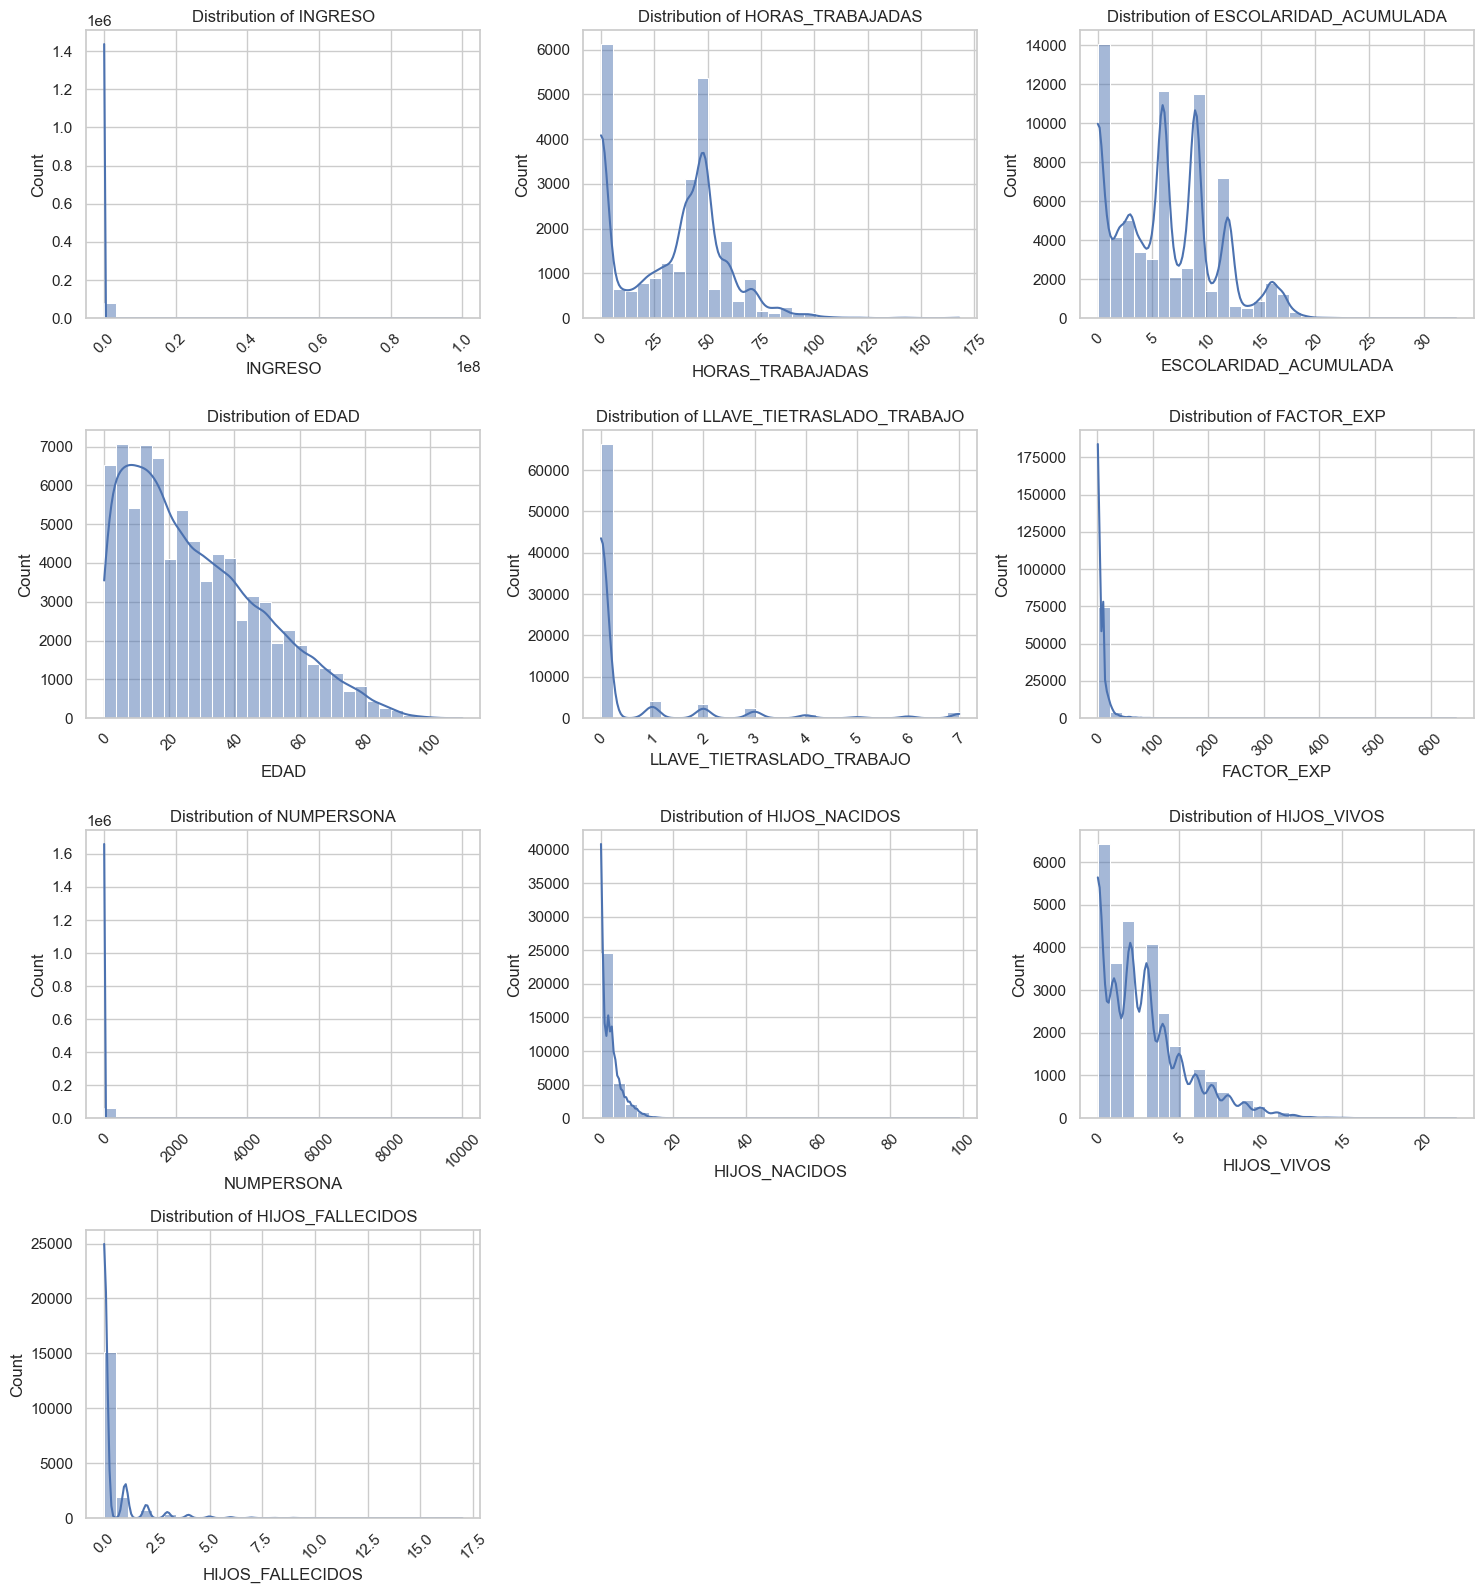

In [12]:
# 3) Plot Continuous Variables (Histograms)
n_cols = 3
n_rows = -(-len(continuous_vars) // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(continuous_vars):
    sns.histplot(data=df, x=col, ax=axs[i], kde=True, bins=30)
    axs[i].set_title(f"Distribution of {col}")
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

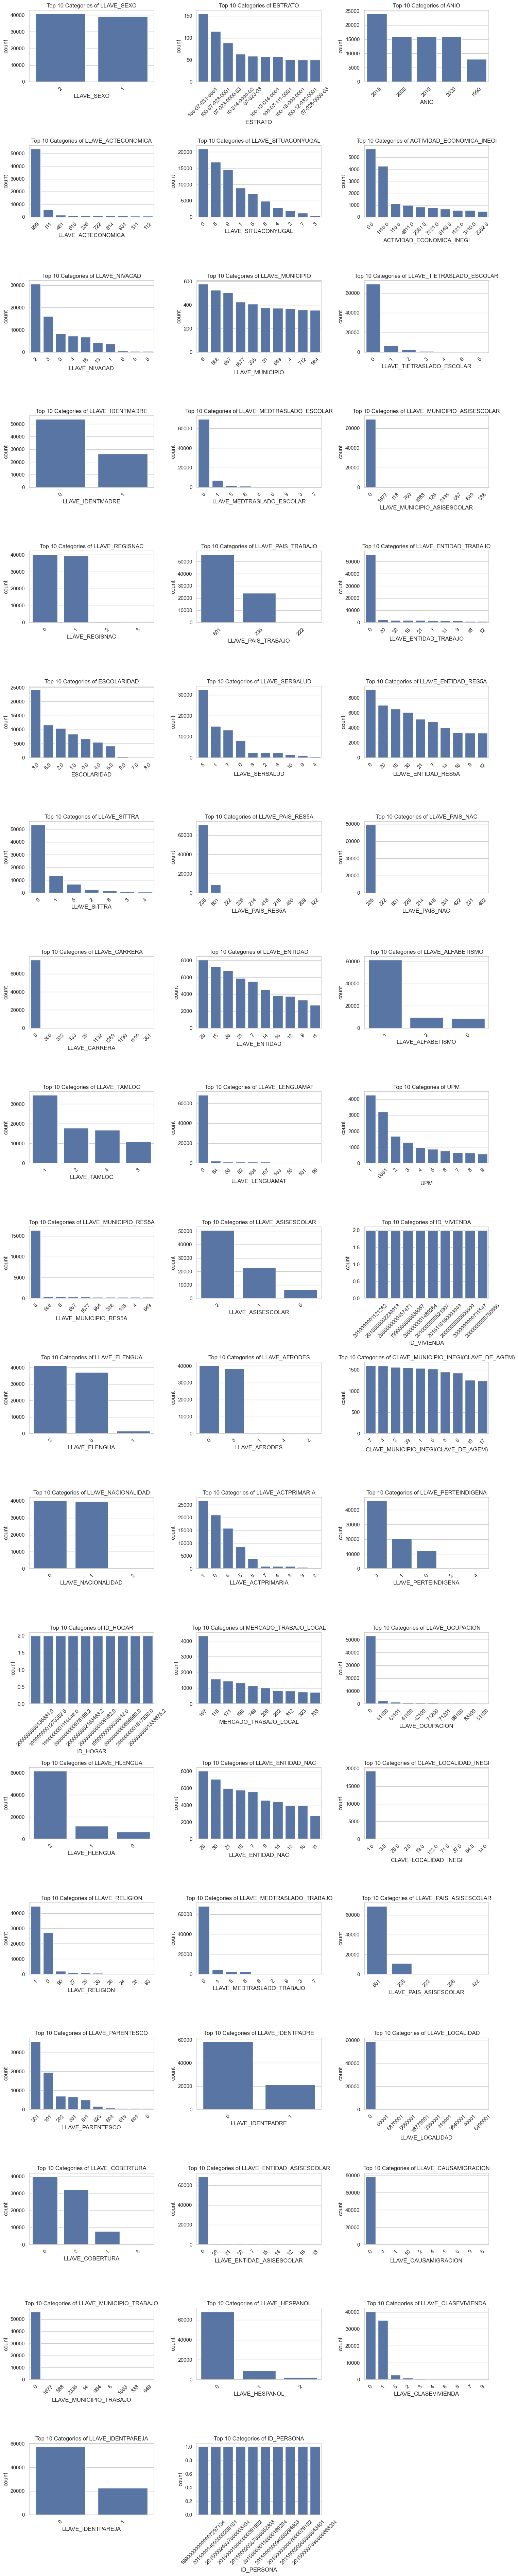

In [13]:
# 4) 4. Plot Categorical Variables (Bar Plots)

n_cols = 3
n_rows = -(-len(categorical_vars) // n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, ax=axs[i], order=df[col].value_counts().index[:10])
    axs[i].set_title(f"Top 10 Categories of {col}")
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Selection of variables

In [14]:
# 🎯 Target Variable
target_variable = ['INGRESO']

# 🌍 Geographical / Labor Market Context
geographical_context = ['MERCADO_TRABAJO_LOCAL']  # Local Labor Market

# 🛠️ Work and Commute Characteristics
work_characteristics = [
    'HORAS_TRABAJADAS',           # Working hours
    'LLAVE_TIETRASLADO_TRABAJO',  # Commute time to work
    'ACTIVIDAD_ECONOMICA_INEGI',  # Economic sector
    'LLAVE_SITTRA',               # Job position
    'LLAVE_OCUPACION',            # Occupation
    'LLAVE_ACTPRIMARIA'           # Primary activity
]

# 🎓 Education
education_variables = [
    'ESCOLARIDAD_ACUMULADA',      # Accumulated schooling
    'LLAVE_ALFABETISMO',          # Literacy
    'LLAVE_NIVACAD'               # Academic level
]

# 🧍 Sociodemographic Characteristics
sociodemographic_variables = [
    'EDAD',                       # Age
    'LLAVE_SITUACONYUGAL',        # Marital status
    'LLAVE_CAUSAMIGRACION',       # Reason for migration
    'LLAVE_PERTEINDIGENA',        # Indigenous identity
    'LLAVE_HESPANOL',             # Speaks Spanish
    'LLAVE_RELIGION',             # Religion
    'LLAVE_AFRODES',              # Afrodescendant identity
    'LLAVE_NACIONALIDAD',         # Nationality
    'LLAVE_SEXO'                  # Sex
]

# ✅ Combine all selected variables into one list
selected_columns = (
    target_variable +
    geographical_context +
    work_characteristics +
    education_variables +
    sociodemographic_variables
)

# 🎯 Create a new DataFrame with only the selected variables
df_selected = df[selected_columns].copy()

# 🖨️ Optional: Check shape and preview
print(f"✅ Selected dataset shape: {df_selected.shape}")
df_selected.head()

✅ Selected dataset shape: (80000, 20)


,INGRESO,MERCADO_TRABAJO_LOCAL,HORAS_TRABAJADAS,LLAVE_TIETRASLADO_TRABAJO,ACTIVIDAD_ECONOMICA_INEGI,LLAVE_SITTRA,LLAVE_OCUPACION,LLAVE_ACTPRIMARIA,ESCOLARIDAD_ACUMULADA,LLAVE_ALFABETISMO,LLAVE_NIVACAD,EDAD,LLAVE_SITUACONYUGAL,LLAVE_CAUSAMIGRACION,LLAVE_PERTEINDIGENA,LLAVE_HESPANOL,LLAVE_RELIGION,LLAVE_AFRODES,LLAVE_NACIONALIDAD,LLAVE_SEXO
0,0.0,422,0.0,0,0.0,0,0,0,1.0,1,2,7.0,0,0,0,1,1,0,0,1
1,0.0,197,0.0,0,0.0,0,0,5,5.0,1,2,14.0,9,0,0,0,1,0,0,1
2,1200.0,61,52.0,0,82003.0,1,23508,1,12.0,1,4,42.0,8,0,0,0,1,0,0,2
3,0.0,171,0.0,0,0.0,0,0,6,4.0,1,2,52.0,8,0,0,0,1,0,0,2
4,0.0,118,0.0,0,0.0,0,0,0,NaN,2,0,5.0,0,0,0,0,1,0,0,2


In [15]:
df_selected.dtypes

INGRESO                      float64
MERCADO_TRABAJO_LOCAL          int64
HORAS_TRABAJADAS             float64
LLAVE_TIETRASLADO_TRABAJO      int64
ACTIVIDAD_ECONOMICA_INEGI    float64
LLAVE_SITTRA                   int64
LLAVE_OCUPACION                int64
LLAVE_ACTPRIMARIA              int64
ESCOLARIDAD_ACUMULADA        float64
LLAVE_ALFABETISMO              int64
LLAVE_NIVACAD                  int64
EDAD                         float64
LLAVE_SITUACONYUGAL            int64
LLAVE_CAUSAMIGRACION           int64
LLAVE_PERTEINDIGENA            int64
LLAVE_HESPANOL                 int64
LLAVE_RELIGION                 int64
LLAVE_AFRODES                  int64
LLAVE_NACIONALIDAD             int64
LLAVE_SEXO                     int64
dtype: object

Correlation analysis

INGRESO                      1.000000
LLAVE_CARRERA                0.028868
ESCOLARIDAD_ACUMULADA        0.011529
LLAVE_CAUSAMIGRACION         0.011052
LLAVE_MEDTRASLADO_TRABAJO    0.009676
                               ...   
LLAVE_ACTECONOMICA          -0.010258
LLAVE_PAIS_TRABAJO          -0.013491
HIJOS_NACIDOS               -0.026424
HIJOS_VIVOS                 -0.040871
HIJOS_FALLECIDOS            -0.084613
Name: INGRESO, Length: 63, dtype: float64


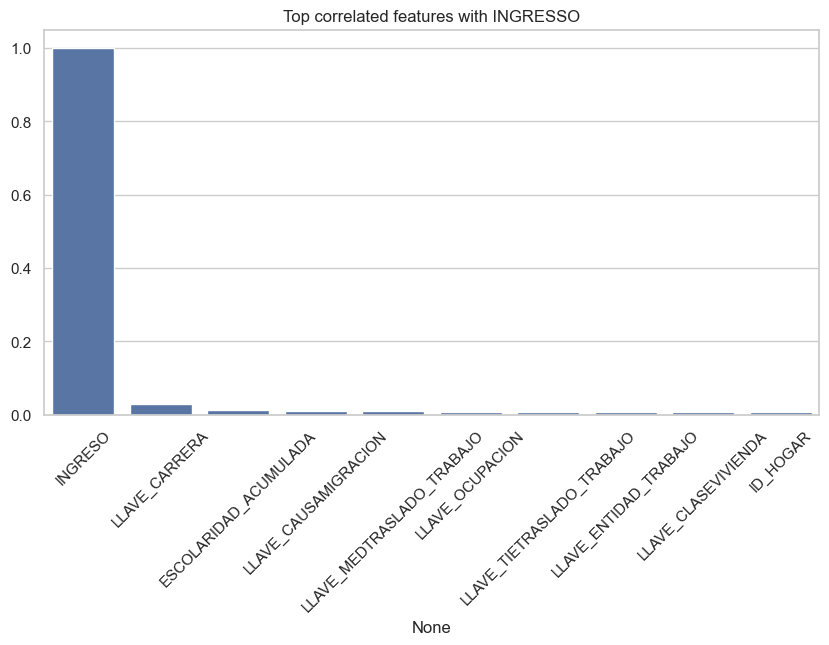

In [63]:
# Select only numerical columns
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with the target variable
correlations = num_vars.corr()['INGRESO'].sort_values(ascending=False)

# Display top correlations
print(correlations)

# Plot top 10 correlated features
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index[:10], y=correlations.values[:10])
plt.xticks(rotation=45)
plt.title("Top correlated features with INGRESSO")
plt.show()

In [80]:
from sklearn.feature_selection import mutual_info_regression

cat_vars = df.select_dtypes(include='object').columns
X_cat = pd.get_dummies(df[cat_vars], drop_first=True)
mi = mutual_info_regression(X_cat, df['INGRESO'])

# Mostrar top variables
mi_series = pd.Series(mi, index=X_cat.columns).sort_values(ascending=False)
print(mi_series.head(10))

: 

Categorical Variables Embedding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Asignar IDs únicos
categorical_cols = ['LLAVE_OCUPACION', 'LLAVE_SITTRA', 'LLAVE_ACTPRIMARIA', 'LLAVE_RELIGION', 'LLAVE_SEXO', 'MERCADO_TRABAJO_LOCAL']
df_encoded = df.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Guardar por si necesitas invertirlo luego

Analysis

In [ ]:
# Import train_test_split.
from sklearn.model_selection import train_test_split


# Create features X and target y.
X = pd.DataFrame(df, columns=housing.feature_names)[["AveRooms"]]
y = housing.target  # Median house value in $100,000s


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices